# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
# 大致瀏覽資料的樣子
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 看看有多少欄
col_names = app_train.columns
print(col_names)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [6]:
# 資料格式有哪些
app_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

有約 122 個欄位，然而不是每些欄位可以計算平均值和標準差，甚至是畫成直方圖   
因此，我們應先挑選出離散或連續的數值變項，其算其平均值、標準差和畫直方圖  
而如果是類別型但是數值變項，可以算平均值、標準差，但要畫應該是畫長條圖比較適合  
弱勢類別行的文字變項，則不該算平均值、標準差，但還是可以畫長條圖

In [7]:
# 挑選 features type
int_features = []
float_features = []
obj_features = []

for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == "int64":
        int_features.append(feature)
    elif dtype == "float64":
        float_features.append(feature)
    else:
        obj_features.append(feature)

我以 float variable 為例

In [8]:
# 計算 float variables 的平均數與標準差
float_stat = {'mean': app_train[float_features].mean(),
        'sd':   app_train[float_features].std()
       }
float_stat_df = pd.DataFrame(float_stat)
float_stat_df

,mean,sd
AMT_INCOME_TOTAL,168797.919297,237123.146279
AMT_CREDIT,599025.999706,402490.776996
AMT_ANNUITY,27108.573909,14493.737315
AMT_GOODS_PRICE,538396.207429,369446.460540
REGION_POPULATION_RELATIVE,0.020868,0.013831
DAYS_REGISTRATION,-4986.120328,3522.886321
OWN_CAR_AGE,12.061091,11.944812
CNT_FAM_MEMBERS,2.152665,0.910682
EXT_SOURCE_1,0.502130,0.211062
EXT_SOURCE_2,0.514393,0.191060


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a9499b0>,
      dtype=object)

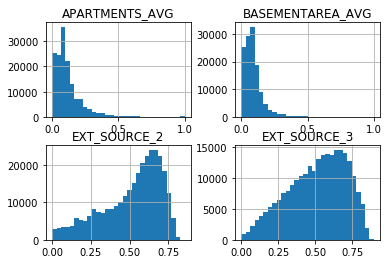

In [9]:
# 我們意思意思畫幾個直方圖
app_train[float_features[9:13]].hist(bins = 30)

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

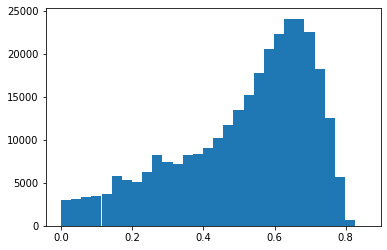

In [10]:
# or use matplotlib
plt.hist(app_train[float_features[9]], bins = 30)
plt.show

若我們已字串形式的類別變項為例：

In [11]:
# 計算性別各子類別的數量
app_train_gender = app_train["CODE_GENDER"].reset_index()
app_train_gender.columns = ["Count", "GENDER_TYPE"]
app_train_gender_table = app_train_gender.groupby("GENDER_TYPE").aggregate("count").reset_index()
app_train_gender_table

,GENDER_TYPE,Count
0,F,202448
1,M,105059
2,XNA,4


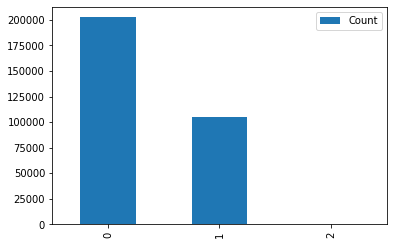

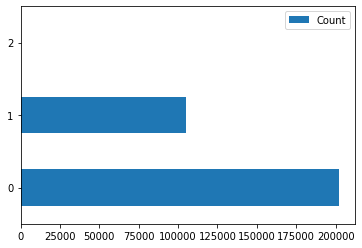

In [12]:
# 畫成長條圖
app_train_gender_table.plot(kind = "bar")
app_train_gender_table.plot(kind = "barh")

<function matplotlib.pyplot.show(*args, **kw)>

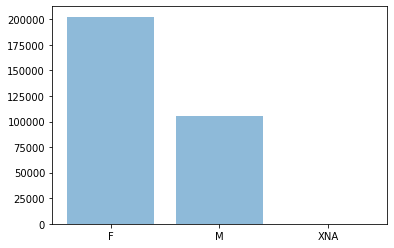

In [13]:
# or use matplotlib
plt.bar(app_train_gender_table['GENDER_TYPE'], app_train_gender_table["Count"], align='center', alpha=0.5)
plt.show